# Project: COVID-19 comorbidities.

### Goal: Determine important variables and models associated with death of COVID19.
- Your research question will be to determine variables associated with death of COVID19. 
    - You will need to data wrangle your input variable to obtain a proper binary response of “death” or “survived”. This will require some work to do.
    - Perform a test on a two by two table to determine if death is independent of diabetes.
    - Explain how you chose the statistical test analyze the contingency table.
    - Explain what logistic regression is, and include some theoretical aspects.
    - Explain why a logistic regression is more powerful than using a two by two table analysis.
    - Create a new derived variable such as the number of medical conditions. Be creative with creating a new variable and determine If this variable is associated with the outcome of death.
    - Discuss at least two different model building methods for regression.
    - Explain the meaning of two way interaction terms, higher order terms, and consider including them in your logistic regression model
    - Begin by building your best models to predict death. What are your models, and explain the meaning of each model
    - How “accurate” is your model in making correct classifications.
    - Graph the ROC curve, and explain how you might adjust your criteria for classification based on the ROC curve. Explain if you are more concerned about making a false positive and negative as wells as the meaning of each scenario.
    - Assess the impact and importance of the variables in your final model.
    - Explore the impact of changing two different variables (one variable at a time), and explain how the odds of death is changed with respect to each variable.
    
    
### Columns:
The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

- __sex__: 1 for female and 2 for male.
- __age__: of the patient.
- __classification__: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees.
    - 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
- __patient type__: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
- __pneumonia__: whether the patient already have air sacs inflammation or not.
- __pregnancy__: whether the patient is pregnant or not.
- __diabetes__: whether the patient has diabetes or not.
- __copd__: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
- __asthma__: whether the patient has asthma or not.
- __inmsupr__: whether the patient is immunosuppressed or not.
- __hypertension__: whether the patient has hypertension or not.
- __cardiovascular__: whether the patient has heart or blood vessels related disease.
- __renal chronic__: whether the patient has chronic renal disease or not.
- __other disease__: whether the patient has other disease or not.
- __obesity__: whether the patient is obese or not.
- __tobacco__: whether the patient is a tobacco user.
- __usmr__: Indicates whether the patient treated medical units of the first, second or third level.
- __medical unit__: type of institution of the National Health System that provided the care.
- __intubed__: whether the patient was connected to the ventilator.
- __icu__: Indicates whether the patient had been admitted to an Intensive Care Unit.
- __date died__: If the patient died indicate the date of death, and 9999-99-99 otherwise.
- __has_died__: Added column. If patient is deceased or not.

__Note: In the Boolean features, 1 means "yes" and 2 means "no". values as 97/98/99 are missing data.__"

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        print(file_path)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-dataset/Covid Data.csv


# Import Data and Inspect Data Types

In [2]:
df = pd.read_csv(file_path)
df.columns = df.columns.str.lower()

df.head()

,usmer,medical_unit,sex,patient_type,date_died,intubed,pneumonia,age,pregnant,diabetes,...,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,icu
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   usmer                 1048575 non-null  int64 
 1   medical_unit          1048575 non-null  int64 
 2   sex                   1048575 non-null  int64 
 3   patient_type          1048575 non-null  int64 
 4   date_died             1048575 non-null  object
 5   intubed               1048575 non-null  int64 
 6   pneumonia             1048575 non-null  int64 
 7   age                   1048575 non-null  int64 
 8   pregnant              1048575 non-null  int64 
 9   diabetes              1048575 non-null  int64 
 10  copd                  1048575 non-null  int64 
 11  asthma                1048575 non-null  int64 
 12  inmsupr               1048575 non-null  int64 
 13  hipertension          1048575 non-null  int64 
 14  other_disease         1048575 non-null  int64 
 15

Since date_time is the only non 'int64' dtype, I will see if it can be casted to 'datetime64'

Note: if date_died == '9999-99-99' then the individual did not die

In [4]:
df['date_died'].describe()

count        1048575
unique           401
top       9999-99-99
freq          971633
Name: date_died, dtype: object

In [5]:
total_dates = len(df['date_died'])

# boolean mask set to where date is not equal to '9999-99-99'
mask_valid_dates = df['date_died'] != '9999-99-99'

valid_dates = len(df['date_died'][mask_valid_dates])

print(f"Percent of Valid Dates: {(valid_dates/total_dates)*100:.2f}%")

Percent of Valid Dates: 7.34%


- With over 92% of the 'date_died' column being an invalid date ('9999-99-99'), I will not cast that column to 'datetime64'. 
- However, I will use that mask to set up a 'has_died' column
- Once 'has_died' is created, I will drop 'date_died' since none of the research questions  

In [6]:
# create has_died column based on the '9999-99-99' in date_died
df = df.assign(has_died=np.where(mask_valid_dates, 1, 0))

# drop date_died
df = df.drop(columns=['date_died'])

In [7]:
# view changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype
---  ------                --------------    -----
 0   usmer                 1048575 non-null  int64
 1   medical_unit          1048575 non-null  int64
 2   sex                   1048575 non-null  int64
 3   patient_type          1048575 non-null  int64
 4   intubed               1048575 non-null  int64
 5   pneumonia             1048575 non-null  int64
 6   age                   1048575 non-null  int64
 7   pregnant              1048575 non-null  int64
 8   diabetes              1048575 non-null  int64
 9   copd                  1048575 non-null  int64
 10  asthma                1048575 non-null  int64
 11  inmsupr               1048575 non-null  int64
 12  hipertension          1048575 non-null  int64
 13  other_disease         1048575 non-null  int64
 14  cardiovascular        1048575 non-null  int64
 15  obesity        

In [8]:
# view 20 random samples from the data
df.sample(20, random_state=1234)

,usmer,medical_unit,sex,patient_type,intubed,pneumonia,age,pregnant,diabetes,copd,...,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,icu,has_died
424938,2,9,1,1,97,2,78,2,2,2,...,2,1,2,1,2,2,2,7,97,0
673819,2,12,1,1,97,2,34,2,2,2,...,2,2,2,2,2,2,2,5,97,0
110509,2,4,1,1,97,2,47,2,2,2,...,2,2,1,2,2,2,2,3,97,0
442945,2,11,2,1,97,2,71,97,1,2,...,2,1,2,2,2,2,2,6,97,0
785107,2,12,1,1,97,2,24,2,2,2,...,2,2,2,2,2,2,2,7,97,0
857706,1,12,1,1,97,2,50,2,2,2,...,2,2,2,2,1,2,2,7,97,0
27697,2,4,2,2,1,1,80,97,2,2,...,2,1,2,2,2,2,2,3,2,1
53438,2,4,2,2,2,1,58,97,2,2,...,2,2,2,2,1,2,1,3,2,1
495190,2,12,2,1,97,2,33,97,2,2,...,2,2,2,2,2,2,1,3,97,0
29864,1,4,1,2,1,1,62,2,2,1,...,2,2,2,2,1,2,2,3,2,1


# Exploratory Data Analysis

How much missing data is there?

In [9]:
# get categorical_cols
categorical_cols = list(df.loc[:, df.columns != 'age'].columns)
# replace 97/98/99 with np.nan
df = df.replace(97, np.nan).replace(98, np.nan).replace(99, np.nan)

# replace 2 values as 0 for binary_cols
binary_cols = [col for col in categorical_cols if (col != 'clasiffication_final' and col != 'medical_unit')]

for col in binary_cols:
    df[col] = df[col].replace(2, 0)

In [10]:
df.isna().sum()

usmer                        0
medical_unit                 0
sex                          0
patient_type                 0
intubed                 855869
pneumonia                16003
age                        345
pregnant                527265
diabetes                  3338
copd                      3003
asthma                    2979
inmsupr                   3404
hipertension              3104
other_disease             5045
cardiovascular            3076
obesity                   3032
renal_chronic             3006
tobacco                   3220
clasiffication_final         0
icu                     856032
has_died                     0
dtype: int64

In [11]:
# fill back to an integer?
# df.fillna(-1)

While all the columns are integers, most of the columns are categorical data that are represented by integers. One of the first things that I am interested in will be the counts of the categories found for each column. 

In [12]:
# age distribution
df['age'].describe().apply(lambda x: format(x, 'f'))

count    1048230.000000
mean          41.775650
std           16.879539
min            0.000000
25%           30.000000
50%           40.000000
75%           53.000000
max          121.000000
Name: age, dtype: object

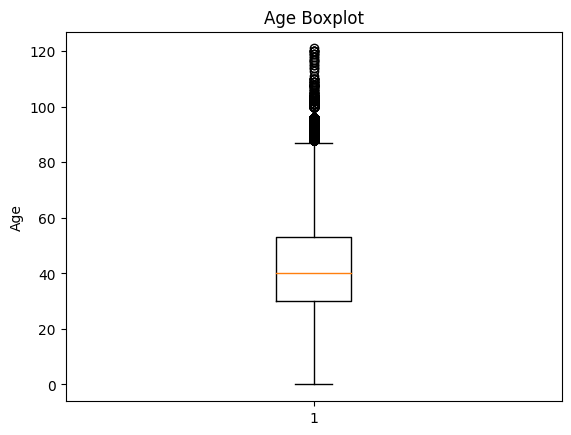

In [13]:
fig, ax = plt.subplots()

ax.boxplot(df['age'].dropna())

ax.set_xlabel('')
ax.set_ylabel('Age')
ax.set_title('Age Boxplot')

plt.show()

There seems to be a lot of outliers of patients older than 90. We can see the outliers and quartiles with the boxplot, but what is the distribution of age?

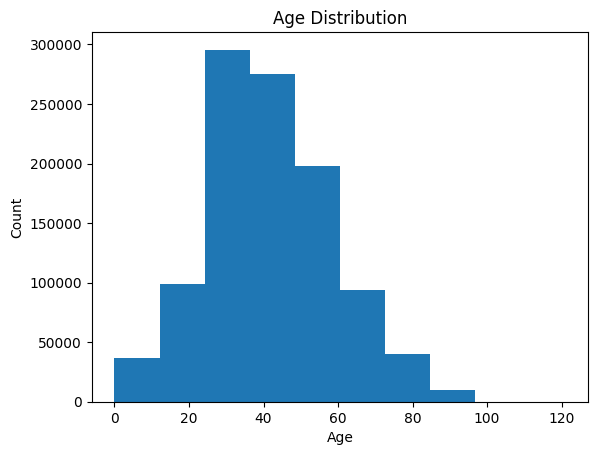

In [14]:
fig, ax = plt.subplots()

bins = int(np.sqrt(df['age'].nunique()))
ax.hist(df['age'], bins=bins)

ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Age Distribution')

plt.show()

In [15]:
# since age has 121 values, I am goint to exclude it from the categorical_cols
categorical_cols = list(df.loc[:, df.columns != 'age'].columns)

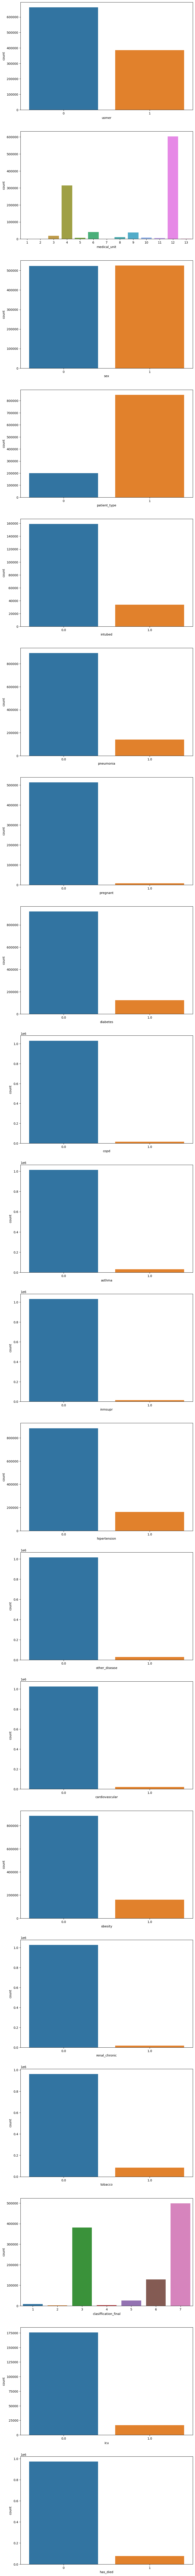

In [16]:
fig, ax = plt.subplots(len(categorical_cols), 1, figsize=(10,150))
for i, col in enumerate(categorical_cols):    
    sns.countplot(x=col, data=df, ax=ax[i])
        
plt.show()

# Research Questions


- Perform a test on a two by two table to determine if death is independent of diabetes.
- Explain how you chose the statistical test analyze the contingency table.
- Explain what logistic regression is, and include some theoretical aspects.
- Explain why a logistic regression is more powerful than using a two by two table analysis.
- Create a new derived variable such as the number of medical conditions. Be creative with creating a new variable and determine If this variable is associated with the outcome of death.
- Discuss at least two different model building methods for regression.
- Explain the meaning of two way interaction terms, higher order terms, and consider including them in your logistic regression model
- Begin by building your best models to predict death. What are your models, and explain the meaning of each model
- How “accurate” is your model in making correct classifications.
- Graph the ROC curve, and explain how you might adjust your criteria for classification based on the ROC curve. Explain if you are more concerned about making a false positive and negative as wells as the meaning of each scenario.
- Assess the impact and importance of the variables in your final model.
- Explore the impact of changing two different variables (one variable at a time), and explain how the odds of death is changed with respect to each variable.

In [17]:
df.loc[:,['diabetes', 'has_died']]

,diabetes,has_died
0,0.0,1
1,0.0,1
2,1.0,1
3,0.0,1
4,1.0,1
...,...,...
1048570,0.0,0
1048571,0.0,0
1048572,0.0,0
1048573,0.0,0


In [18]:
df['diabetes'].value_counts()

diabetes
0.0    920248
1.0    124989
Name: count, dtype: int64

In [19]:
df['has_died'].sum()

76942

In [20]:
# create the 2x2 table
diabetes_data = pd.DataFrame(df.groupby(['diabetes'])['has_died'].sum()).assign(population=np.array(df['diabetes'].value_counts()))

# re-order
diabetes_data = diabetes_data.loc[:, ['population', 'has_died']]

diabetes_data

,population,has_died
diabetes,,
0.0,920248,47946
1.0,124989,28265


# 1. Perform a test on a two by two table to determine if death is independent of diabetes.
- Explain how you chose the statistical test analyze the contingency table.
- source for which test: https://www.graphpad.com/quickcalcs/contingency1/

In [21]:
import numpy as np
from scipy.stats import chi2_contingency

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(diabetes_data)

# Print the results
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")

# Interpret the results
alpha = 0.05
print(f"\nSignificance level: {alpha}")
if p < alpha:
    print("Reject the null hypothesis. There is a significant association between death and diabetes.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between death and diabetes.")


Chi-squared statistic: 38018.35486932474
P-value: 0.0

Significance level: 0.05
Reject the null hypothesis. There is a significant association between death and diabetes.


# 2. Explain what logistic regression is, and include some theoretical aspects.
- Explain why a logistic regression is more powerful than using a two by two table analysis.

Logistic regression is a statistical method used for binary classification problems, where the outcome variable is categorical and has only two possible outcomes (usually coded as 0 and 1). It is an extension of linear regression, but instead of predicting a continuous outcome, logistic regression models the probability that the dependent variable belongs to a particular category.

The logistic regression model uses the logistic function, also known as the sigmoid function, to transform a linear combination of predictor variables into values between 0 and 1. The logistic function is defined as:

$$P(Y=1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n)}}$$

Here:
- $P(Y=1)$ is the probability of the event occurring.
- $\beta_0$ is the intercept term.
- $\beta_1$, \beta_2, ..., \beta_n \) are the coefficients associated with the predictor variables \(X_1, X_2, ..., X_n\).
- $e$ is the base of the natural logarithm.

The logistic regression model is fitted to the data using a process called maximum likelihood estimation to find the values of the coefficients that maximize the likelihood of observing the given data.

Now, regarding why logistic regression is more powerful than using a two by two table analysis:

1. **Continuous Predictors:** Logistic regression allows for the inclusion of continuous predictor variables, providing a more flexible approach when dealing with quantitative data. In contrast, a two by two table analysis typically involves categorical variables only.

2. **Handling Confounding Variables:** Logistic regression can control for confounding variables by including them as covariates in the model. This helps in isolating the effect of the predictors of interest, which may not be possible in a simple two by two table analysis.

3. **Probabilistic Outputs:** Logistic regression provides probabilities of belonging to a particular class, allowing for a more nuanced understanding of the uncertainty associated with predictions. In a two by two table analysis, you may get raw counts without a clear indication of the likelihood or confidence in those counts.

4. **Robustness to Sample Size:** Logistic regression tends to be more robust when dealing with small sample sizes compared to some two by two table analyses, especially in scenarios where the number of events per predictor variable is low.

Overall, logistic regression offers a more sophisticated and versatile approach for modeling binary outcomes, particularly in situations involving multiple predictor variables and a need for probabilistic predictions.

# 3. Create a new derived variable 
- such as the number of medical conditions. Be creative with creating a new variable and determine If this variable is associated with the outcome of death.

In [26]:
df_new = df.assign(lifestyle=lambda x: x['diabetes'] + x['obesity'] + x['tobacco'])

In [39]:
lifestyle_data = pd.DataFrame(df_new.groupby('has_died')['lifestyle'].sum()).assign(population=np.array(df['has_died'].value_counts()))
lifestyle_data = lifestyle_data.loc[:, ['population', 'lifestyle']]
lifestyle_data

,population,lifestyle
has_died,,
0,971633,316385.0
1,76942,51852.0


In [37]:
import numpy as np
from scipy.stats import chi2_contingency

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(lifestyle_data)

# Print the results
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")

# Interpret the results
alpha = 0.05
print(f"\nSignificance level: {alpha}")
if p < alpha:
    print("Reject the null hypothesis. There is a significant association between death and diabetes.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between death and diabetes.")


Chi-squared statistic: 14995.237099505033
P-value: 0.0

Significance level: 0.05
Reject the null hypothesis. There is a significant association between death and diabetes.


In [38]:
p-1

-1.0